In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv('data_science_job.csv')

In [249]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
14244,29884,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,15.0,NaN,NaN,65.0,1.0
11494,10539,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,Humanities,15.0,10/49,Pvt Ltd,103.0,0.0
1544,9687,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Public Sector,140.0,0.0
11947,24015,city_11,0.550,Male,No relevent experience,Full time course,High School,NaN,5.0,NaN,NaN,4.0,1.0
10680,8918,city_70,0.698,NaN,Has relevent experience,Full time course,Graduate,STEM,5.0,10/49,Pvt Ltd,46.0,0.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [255]:
cols = df.columns

In [259]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [123]:
# Percentage of null values
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [107]:
df['city_development_index'][2]

0.624

In [117]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [135]:
# Getting columns higher less than 5% of null values
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [137]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [139]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

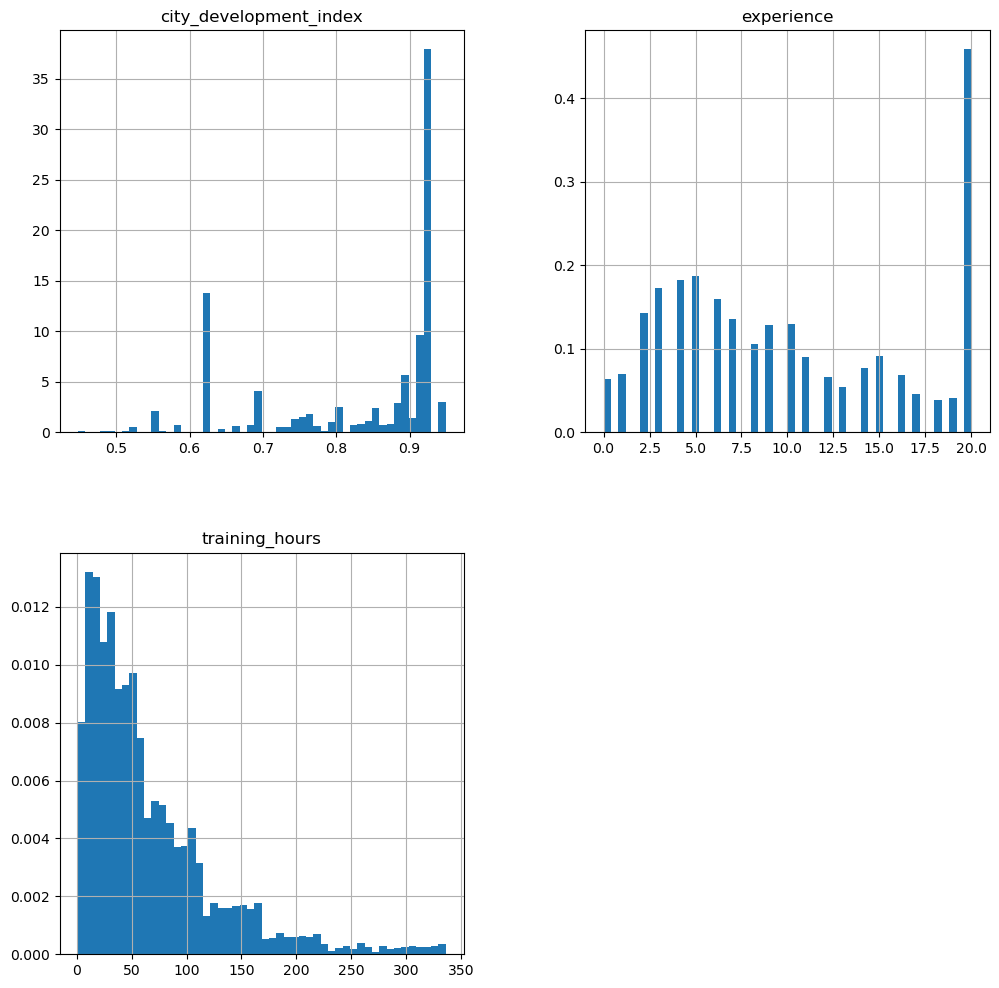

In [145]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

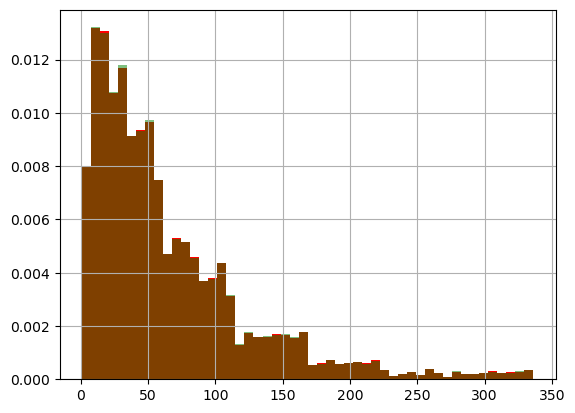

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

<Axes: ylabel='Density'>

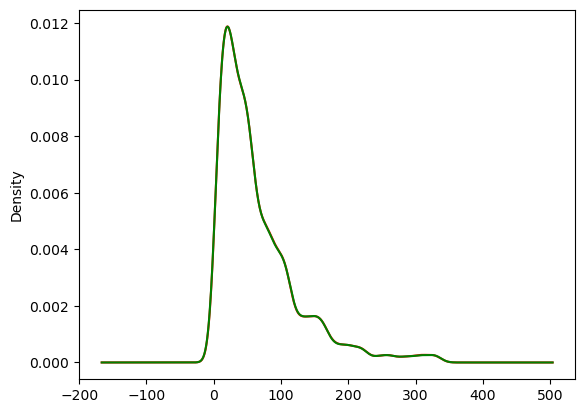

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

<Axes: >

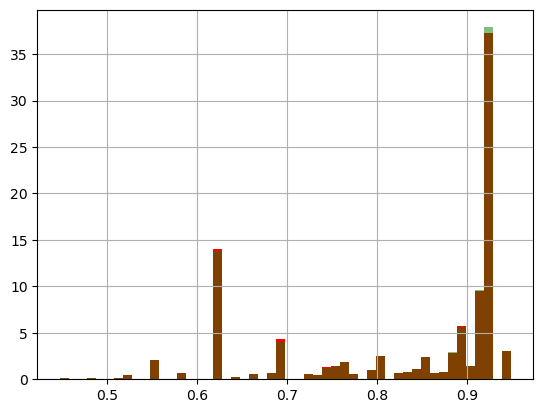

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

<Axes: ylabel='Density'>

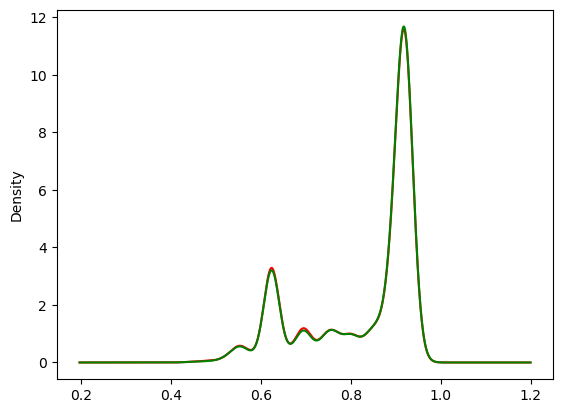

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

In [155]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),

    new_df['enrolled_university'].value_counts() / len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [159]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),

    new_df['education_level'].value_counts() / len(df)
], axis=1)

temp.columns = ['original' , 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876


# Practice

In [216]:
df = pd.read_csv('EVSE-A-charging-Aggressive-scan.csv')

In [218]:
df.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,0,IMAPS,Email,1,1,NaN,NaN,NaN,NaN,NaN
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,0,NetBIOS,System,1,1,NaN,NaN,NaN,NaN,NaN
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,0,IMAP,Email,1,1,NaN,NaN,NaN,NaN,NaN
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,0,RPC,RPC,1,1,NaN,NaN,NaN,NaN,NaN


In [238]:
percent = df.isnull().sum()

id                           0
expiration_id                0
src_ip                       0
src_mac                      0
src_oui                      0
                            ..
dst2src_fin_packets          0
application_name             0
application_category_name    0
application_is_guessed       0
application_confidence       0
Length: 81, dtype: int64

In [196]:
cols = []

In [224]:
cols = [var for var in df.columns if df[var].isnull().mean() > 0.5 and df[var].isnull().mean() > 0]
cols

['requested_server_name',
 'client_fingerprint',
 'server_fingerprint',
 'user_agent',
 'content_type']

In [226]:
df.drop(columns=cols, inplace=True)

In [228]:
df.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,0,0,1,0,1,0,Unknown,Unspecified,0,0
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,0,0,1,0,1,0,IMAPS,Email,1,1
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,0,0,1,0,1,0,NetBIOS,System,1,1
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,0,0,1,0,1,0,IMAP,Email,1,1
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,0,0,1,0,1,0,RPC,RPC,1,1
